# SIO 236 - Lab II : Fourier transforms

### Bia Villas Bôas - avillasb@ucsd.edu

In [350]:
%matplotlib inline

Loading the libraries

In [351]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, random
from matplotlib import cm

## Exercise 1 and 2

In [352]:
nx = 2048 #number of points
lamb = nx/64.# wavelength
x = np.arange(0,nx) # array with nx points from zero to nx-1
theta = 2*pi*x/lamb # argument of cosine with 64 repetitions
y = cos(theta) #cosine function

### a) First for the cosine 

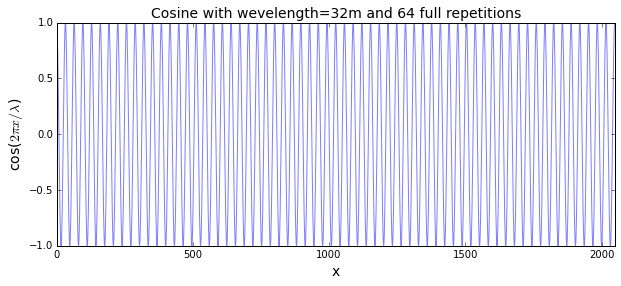

In [353]:
plt.figure(figsize=(10,4))
plt.plot(x,y, '-',alpha=.5)
plt.xlim([0,2048])
plt.xlabel('x', fontsize = 14 )
plt.ylabel('cos($2\pi x/\lambda$)', fontsize =14)
plt.title('Cosine with wevelength=32m and 64 full repetitions', fontsize=14)

In [354]:
k = np.fft.fftshift(np.fft.fftfreq(nx, d=1.0))
fft_cos0 = np.fft.fft(y)
fft_cos = np.fft.fftshift(fft_cos0)
y_reconst = np.fft.ifft(fft_cos0)

#### Now we compute the FFT for the cosine, plot the real an imaginary parts and the recontructed series obtained from the inverse Fourier transform. As predicted from theory, the Fourier transform of even functions is purely real.

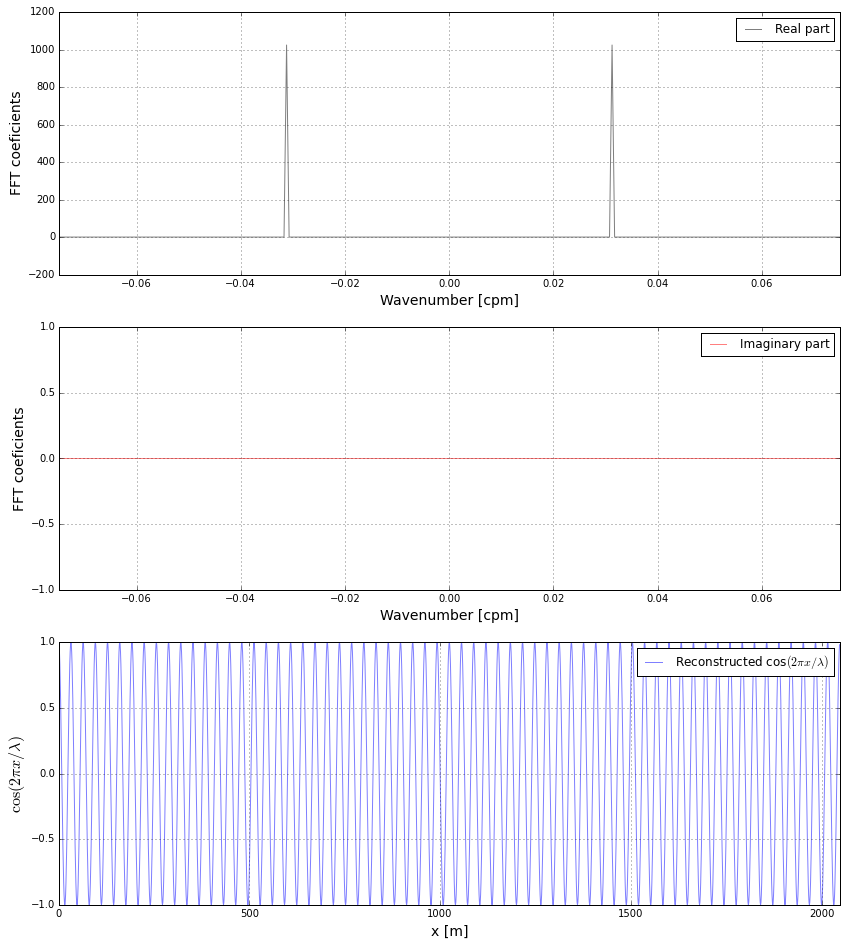

In [355]:
plt.figure(figsize=(14,16))
plt.subplot(311)
plt.plot(k, fft_cos.real, '-k',alpha=.5, label='Real part')
plt.xlim([-0.075,0.075])
plt.grid()
plt.ylabel('FFT coeficients', fontsize=14)
plt.xlabel('Wavenumber [cpm]', fontsize=14)
plt.legend()
plt.subplot(312)
plt.plot(k, fft_cos.imag, '-r',alpha=.5, label='Imaginary part')
plt.xlim([-0.075,0.075])
plt.ylim([-1,1])
plt.xlabel('Wavenumber [cpm]', fontsize=14)
plt.ylabel('FFT coeficients', fontsize=14)
plt.legend()
plt.grid()
plt.subplot(313)
plt.plot(x, y_reconst, '-b',alpha=.5, label='Reconstructed cos$(2\pi x/\lambda)$')
plt.legend()
plt.xlim([0,2048])
plt.xlabel('x [m]', fontsize = 14 )
plt.ylabel('$\cos(2\pi x/\lambda)$', fontsize =16)
plt.grid()

### b) Now for the sine

In [356]:
y = sin(theta)

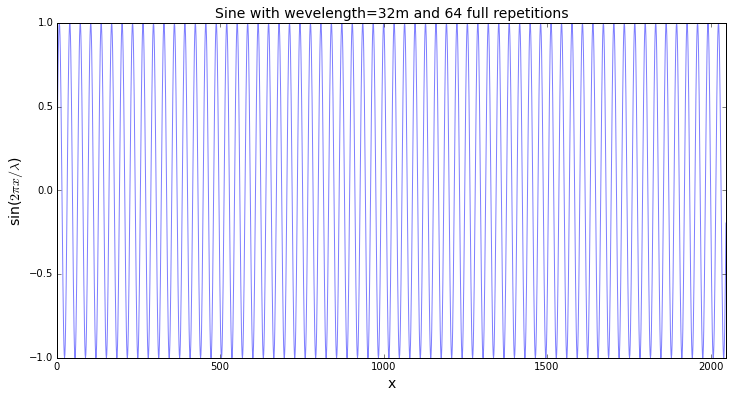

In [357]:
plt.figure(figsize=(12,6))
plt.plot(x,y, '-',alpha=.5)
plt.xlim([0,2048])
plt.xlabel('x', fontsize = 14 )
plt.ylabel('sin($2\pi x/\lambda$)', fontsize =14)
plt.title('Sine with wevelength=32m and 64 full repetitions', fontsize=14)

#### Now we compute the FFT for the sine, plot the real an imaginary parts and the recontructed series obtained from the inverse Fourier transform. As predicted from theory, the Fourier transform of odd functions is purely imaginary.

In [358]:
k = np.fft.fftshift(np.fft.fftfreq(nx, d=1.0))
fft_sin0 = np.fft.fft(y)
fft_sin = np.fft.fftshift(fft_sin0)
y_reconst = np.fft.ifft(fft_sin0)

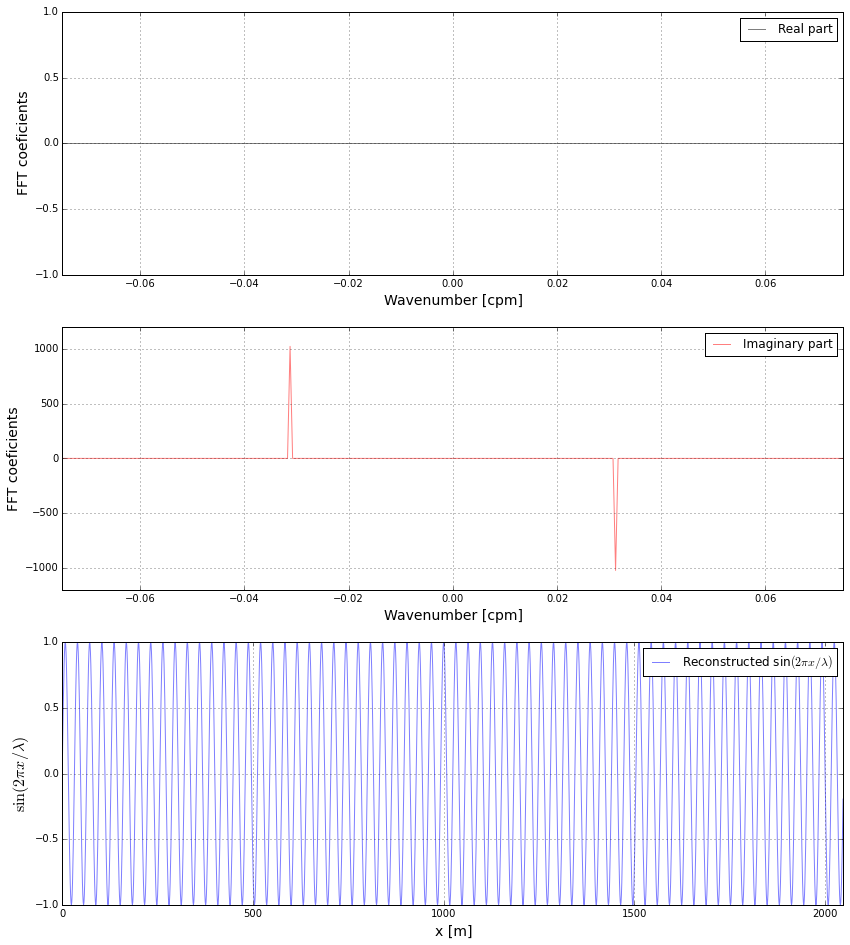

In [359]:
plt.figure(figsize=(14,16))
plt.subplot(311)
plt.plot(k, fft_sin.real, '-k',alpha=.5, label='Real part')
plt.ylim([-1,1])
plt.xlim([-0.075,0.075])
plt.grid()
plt.ylabel('FFT coeficients', fontsize=14)
plt.xlabel('Wavenumber [cpm]', fontsize=14)
plt.legend()
plt.subplot(312)
plt.plot(k, fft_sin.imag, '-r',alpha=.5, label='Imaginary part')
plt.ylim([-1200,1200])
plt.xlim([-0.075,0.075])
plt.legend()
plt.xlabel('Wavenumber [cpm]', fontsize=14)
plt.ylabel('FFT coeficients', fontsize=14)
plt.grid()
plt.subplot(313)
plt.plot(x, y_reconst, '-b',alpha=.5, label='Reconstructed sin$(2\pi x/\lambda)$')
plt.legend()
plt.xlim([0,2048])
plt.xlabel('x [m]', fontsize = 14 )
plt.ylabel('$\sin(2\pi x/\lambda)$', fontsize =16)
plt.grid()

## Exercise 3

I'm having trouble to see the point of this exercise.

In [360]:
x = np.linspace(-10,10,300) # creating 300 number between -10 an 10
y = np.linspace(-10,10,400) # creating 400 number between -10 an 10
xx,yy = np.meshgrid(x,y) # creating the meshgrid
z = np.ma.array(cos(xx) + cos(yy), mask=False) # my function
z.mask[100:110,50:60] = True # masking out the values at the positions that were asked on the exercise.

The spot we were asked to identify is the blank square in left bottom quadrant of the figure below.

<matplotlib.colorbar.Colorbar instance at 0x434bcf128>

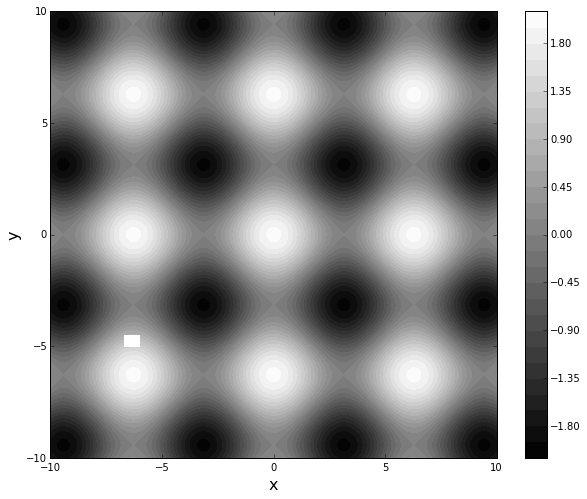

In [361]:
plt.figure(figsize=(10,8))
plt.contourf(xx,yy,z,30, cmap=cm.gray)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.colorbar()


## Exercise 4

In [370]:
# Square of area 100x100
x = np.arange(1024)
y =  np.arange(1024)
a1 = np.ma.zeros((1024,1024))
L = 50
n = a1.shape[0]/2
a1[n-L:n+L,n-L:n+L]=1

# Square of area 400x400
a2 = np.ma.zeros((1024,1024))
L = 200
n = a2.shape[0]/2
a2[n-L:n+L,n-L:n+L]=1

# Rectangle of area 400x400
a3 = np.ma.zeros((1024,1024))
h = 50
w = 400
n = a3.shape[0]/2
a3[n-h:n+h,n-w:n+w]=1

# Circle of area 41076
xx,yy = np.meshgrid(np.linspace(-10,10,1024) ,np.linspace(-10,10,1024))
a4 = np.ma.zeros((1024,1024))
z = xx**2 + yy**2
ind = z<=5
a4[ind] = 1


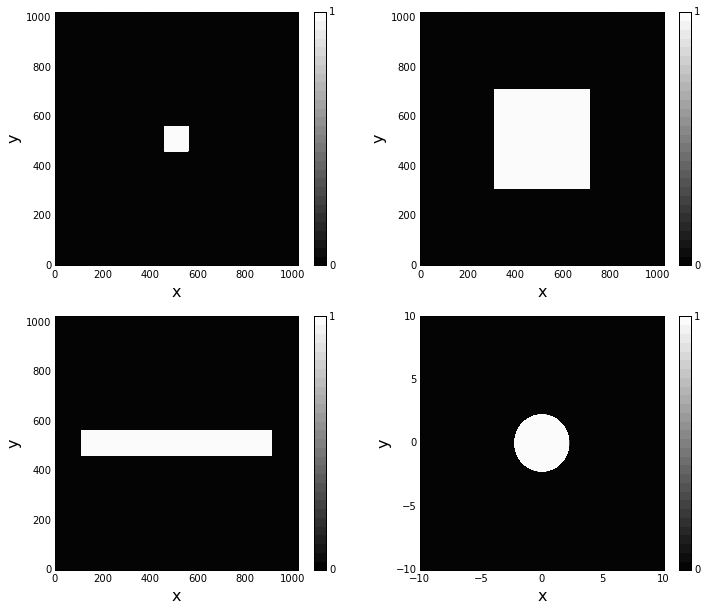

In [374]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
lin = np.linspace(0,1.,30)
plt.contourf(x,y,a1, lin,cmap=cm.gray)
plt.xlim([0,1024])
plt.ylim([0,1024])
cbar = plt.colorbar()
cbar.set_ticks([0,1])

plt.subplot(222)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
lin = np.linspace(0,1.,30)
plt.contourf(x,y,a2, lin,cmap=cm.gray)
plt.xlim([0,1024])
plt.ylim([0,1024])
cbar = plt.colorbar()
cbar.set_ticks([0,1])

plt.subplot(223)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
lin = np.linspace(0,1.,30)
plt.contourf(x,y,a3, lin,cmap=cm.gray)
plt.xlim([0,1024])
plt.ylim([0,1024])
cbar = plt.colorbar()
cbar.set_ticks([0,1])

plt.subplot(224)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
lin = np.linspace(0,1.,30)
plt.contourf(xx,yy,a4, lin,cmap=cm.gray)
cbar = plt.colorbar()
cbar.set_ticks([0,1])


In [378]:
k = np.fft.fftshift(np.fft.fftfreq(1024, d=1.0))
a_fft1 = np.fft.fftshift(np.fft.fft2(a1))
A1 = np.abs(a_fft1)

a_fft2 = np.fft.fftshift(np.fft.fft2(a2))
A2 = np.abs(a_fft2)

a_fft3 = np.fft.fftshift(np.fft.fft2(a3))
A3 = np.abs(a_fft3)

a_fft4 = np.fft.fftshift(np.fft.fft2(a4))
A4 = np.abs(a_fft4)



#### We observe that by changing the size of the aperture, we change the energy (amplitude/angular resolution) of the spectrum, such that a larger aperture will result in larger angular resolution (compare top left and right panels). By changing the shape of the aperture, we also change the shape of the spectral response (see bottom right panel). Fourier modes are more likely to resolve smooth functions, such as gaussians, rather than squares (boxcar, Heaviside).

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


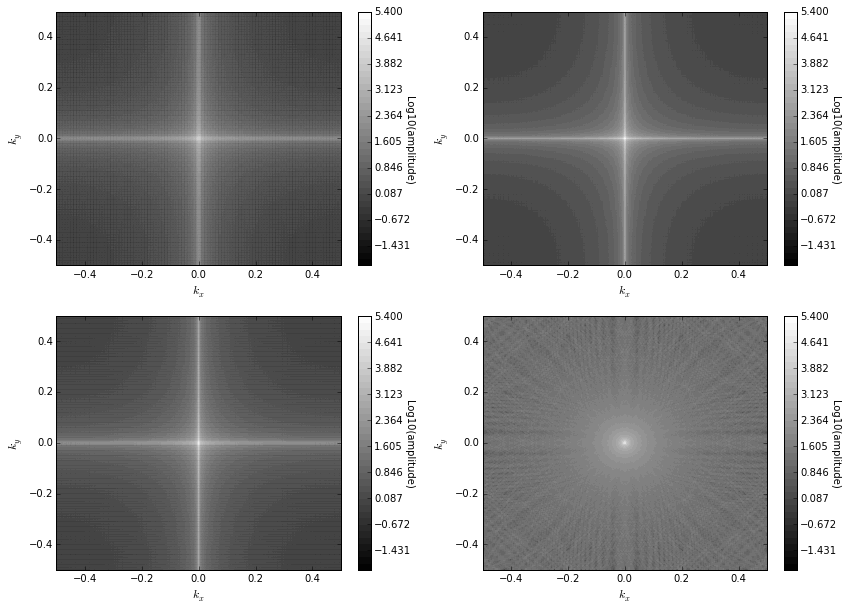

In [385]:
lin = np.linspace(-2.0,5.4,40)
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.contourf(k,k,np.log10(A1),lin, cmap=cm.gray)
plt.xlabel('$k_x$', fontsize=12)
plt.ylabel('$k_y$', fontsize=12)
cbar = plt.colorbar()
cbar.set_label('Log10(amplitude)', rotation=270)

plt.subplot(222)
plt.contourf(k,k,np.log10(A2),lin, cmap=cm.gray)
cbar = plt.colorbar()
plt.xlabel('$k_x$', fontsize=12)
plt.ylabel('$k_y$', fontsize=12)
cbar.set_label('Log10(amplitude)', rotation=270)

plt.subplot(223)
plt.contourf(k,k,np.log10(A3),lin, cmap=cm.gray)
cbar = plt.colorbar()
plt.xlabel('$k_x$', fontsize=12)
plt.ylabel('$k_y$', fontsize=12)
cbar.set_label('Log10(amplitude)', rotation=270)

plt.subplot(224)
plt.contourf(k,k,np.log10(A4),lin, cmap=cm.gray)
cbar = plt.colorbar()
plt.xlabel('$k_x$', fontsize=12)
plt.ylabel('$k_y$', fontsize=12)
cbar.set_label('Log10(amplitude)', rotation=270)

## Exercise 5

In [402]:
x = np.linspace(-10,10,1024) 
y = np.linspace(-10,10,1024) 
xx,yy = np.meshgrid(x,y) # creating the meshgrid
z = np.ma.array(cos(xx) + cos(yy), mask=False) # my function
ind = abs(z) > 1
a = np.ma.zeros((1024,1024))
a[ind] = 1

# Fourier transforming
k = np.fft.fftshift(np.fft.fftfreq(1024, d=1.0))
a_fft = np.fft.fftshift(np.fft.fft2(a))
A = np.abs(a_fft)

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
lin = np.linspace(0,1.,30)
plt.contourf(xx,yy,a, lin,cmap=cm.gray)
cbar = plt.colorbar(orientation='horizontal')
cbar.set_ticks([0,1])
plt.subplot(122)
lin = np.linspace(1,6,20)
plt.contourf(k,k,np.log10(A),lin,cmap=cm.gray)
cbar = plt.colorbar(orientation='horizontal', format='%.1f')
plt.xlabel('$k_x$', fontsize=16)
plt.ylabel('$k_y$', fontsize=16)
cbar.set_label('Log10(amplitude)', fontsize=12)
